# Initializing Dataset Needed for Saturn's moon simulation #

**Date:** 13-12-2024 <br>
**Course:** Modelling 2B

#### Data Needed ####
For our N-body simulation of the Moons we will need Data of these moons. we will differentiate this data in two categories: time-independent and time-dependent.The most important time-independent: Mass, Semimajor-axis, Inclination. The time-dependent data will concern the position and velocity vectors of the moons at a certain time. To gather this data we will make Use of the Horizons Database from NASA's JPL.

In [10]:
#import statements
from astropy.time import Time
import astropy.units as u
from astroquery.jplhorizons import Horizons

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc

import math
import re
import warnings

#some usefull constants
AU= sc.au
G = sc.G

#there are some deprecation warnigs, since: AstropyDeprecationWarning: ``id_type``s 'majorbody' and 'id' are deprecated and replaced with ``None``, which has the same functionality. [astroquery.jplhorizons.core]
# to ignore these i put down the code line below, but still it should preferably be fixed.
warnings.filterwarnings('ignore', category=DeprecationWarning) #doesnt work dont know why.

#### Horizons Database ####

To get data from  <a href="https://ssd.jpl.nasa.gov/horizons/">NASA's JPL Horizons Database</a> we will use the python libary <a href="https://astroquery.readthedocs.io/en/latest/">Astroquery</a>. To talk to the Horizons Database we will need to give the database the ID's of the objects we are interested in. In the table below one can see the ID's of Saturn and the moon we will be interested in. 

| **Object**   | **ID** |
|--------------|--------|
| Saturn       | 699    |
| Mimas        | 601    |
| Enceladus    | 602    |
| Tethys       | 603    |
| Dione        | 604    |
| Rhea         | 605    |
| Titan        | 606    |
| Hyperion     | 607    |
| Iapetus      | 608    |
| Phoebe       | 609    |
| Janus        | 610    |
| Epimetheus   | 611    |
| Helene       | 612    |
| Telesto      | 613    |
| Calypso      | 614    |
| Atlas        | 615    |
| Prometheus   | 616    |
| Pandora      | 617    |
| Pan          | 618    |
| Daphnis      | 635    |


#### Starting with Gathering Data ####

We will store our data as a dictionary, below we will initialize this dictionary with an Horizons ID-parameter.

In [145]:
saturn_id = {
    "Saturn": {"ID": 699},
    "Mimas": {"ID": 601},
    "Enceladus": {"ID": 602},
    "Tethys": {"ID": 603},
    "Dione": {"ID": 604},
    "Rhea": {"ID": 605},
    "Titan": {"ID": 606},
    "Hyperion": {"ID": 607},
    "Iapetus": {"ID": 608},
    "Phoebe": {"ID": 609},
    "Janus": {"ID": 610},
    "Epimetheus": {"ID": 611},
    "Helene": {"ID": 612},
    "Telesto": {"ID": 613},
    "Calypso": {"ID": 614},
    "Atlas": {"ID": 615},
    "Prometheus": {"ID": 616},
    "Pandora": {"ID": 617},
    "Pan": {"ID": 618},
    "Daphnis": {"ID": 635}
}


#### Time-dependent data gathering ####

below we have a mass scraper, this doesn't result in great data, Horizons doesn't have data on all the moons and it's also not greatly accurate

In [2]:
def get_saturn_moons_masses(saturn_data, epoch):
    """
    Warning: not functional
    Get masses for Saturn's moons and update the input dictionary with these values.
    Note: if the Mass from Horizons is somehow not in g or kg it won't find it.

    Parameters:
        saturn_data (dict): Dictionary of moon names and their IDs.
        epoch (list): Julian date(s) or list of calendar dates to query.
        
    Returns:
        dict: Updated dictionary with moon names as keys and their masses added.
    """
    center_id = '500@6'  # Center of the system is Saturn
    
    for moon, data in saturn_data.items():
        target_id = data["ID"]
        # Query the Horizons database for each moon
        moon_data = Horizons(id=target_id, location=center_id, epochs=epoch, id_type=None)
        response = moon_data.ephemerides_async(get_raw_response=True).text
        
        # Extract mass information from the response
        mass_info = re.findall(r"Mass \(10\^(\d\d?) (kg|g)\s?\s?\)\s+=\s+([\d.]+)", response)
        if mass_info:
            e, u, m = mass_info[0]
            mass = float(m) * 10**int(e) * 10**(3*(1-("k" in u)))
        else:
            mass = np.nan  # If no mass information is found, set mass to NaN
        
        # Update the dictionary with the mass
        saturn_data[moon]["Mass"] = mass
    
    return saturn_data

# # example run
# epoch = [2458075.5]  #Julian date 2017
# updated_saturn_data = get_saturn_moons_masses(saturn_id, epoch)

# print(updated_saturn_data)

For now we will get the Mass from the internet which results in the dictionary below:

In [2]:
saturn_data = {
    "Saturn": {"ID": 699, "Mass": 5.6834e+26},  # Mass in kg
    "Mimas": {"ID": 601, "Mass": 3.7493e+19},  # Mass in kg
    "Enceladus": {"ID": 602, "Mass": 1.08022e+20},  # Mass in kg
    "Tethys": {"ID": 603, "Mass": 6.17449e+20},  # Mass in kg
    "Dione": {"ID": 604, "Mass": 1.095452e+21},  # Mass in kg
    "Rhea": {"ID": 605, "Mass": 2.306518e+21},  # Mass in kg
    "Titan": {"ID": 606, "Mass": 1.3452e+23},  # Mass in kg
    "Hyperion": {"ID": 607, "Mass": 5.62e+18},  # Mass in kg
    "Iapetus": {"ID": 608, "Mass": 1.805635e+21},  # Mass in kg
    "Phoebe": {"ID": 609, "Mass": 8.292e+18},  # Mass in kg
    "Janus": {"ID": 610, "Mass": 1.898e+18},  # Mass in kg
    "Epimetheus": {"ID": 611, "Mass": 5.264e+17},  # Mass in kg
    "Helene": {"ID": 612, "Mass": 1.2e+17},  # Mass in kg
    "Telesto": {"ID": 613, "Mass": 4.1e+16},  # Mass in kg
    "Calypso": {"ID": 614, "Mass": 4e+16},  # Mass in kg
    "Atlas": {"ID": 615, "Mass": 7e+16},  # Mass in kg
    "Prometheus": {"ID": 616, "Mass": 1.6e+17},  # Mass in kg
    "Pandora": {"ID": 617, "Mass": 1.4e+17},  # Mass in kg
    "Pan": {"ID": 618, "Mass": 4.95e+15},  # Mass in kg
    "Daphnis": {"ID": 635, "Mass": 6.5e+13}  # Mass in kg
}


In [3]:
def get_saturn_moons_data(saturn_moons_data, epoch = [2458075.5], semi_major=True, include_eccentricity=True, include_inclination=True, units=True):
    """
    Get orbital elements (semi-major axis, eccentricity, and inclination) for Saturn's moons relative to Saturn.
    
    Parameters:
        saturn_moons_data (dict): Dictionary of moon names and their Horizons IDs.
        epoch (list): Julian date(s) or list of calendar dates to query. Default is [2458075.5] (then Daphnis will not Error)
        semi_major (bool): Whether to include the semi-major axis in the output. Default is True.
        include_eccentricity (bool): Whether to include eccentricity in the output. Default is True.
        include_inclination (bool): Whether to include inclination in the output. Default is True.
        units (bool): Whether to use SI units (True) or AU (False). Default is True.
        
    Returns:
        dict: Nested dictionary with moon names as keys and their orbital elements as values.
    """
    results = {}
    center_id = '500@6'  # Center of the system is Saturn
    
    for moon, data in saturn_moons_data.items():
        target_id = data["ID"]
        # Query the Horizons database for each moon
        moon_data = Horizons(id=target_id, location=center_id, epochs=epoch, id_type='id')
        elements = moon_data.elements()
        
        # Initialize result dictionary with existing keys and values
        result = data.copy()
        
        # Extract and convert orbital elements
        if semi_major:
            a = float(elements["a"])
            if units:
                a *= AU
            result["semi-major axis"] = a
        
        if include_eccentricity:
            result["eccentricity"] = float(elements["e"])
        
        if include_inclination:
            result["inclination"] = float(elements["incl"])
        
        # Add to the results dictionary
        results[moon] = result
    
    return results


#### Time-dependent Data ####
We will now gather the time-dependent data i.e. the position and velocity vectors of All the moons. Below is the code used to get the data from the Horizons Database.

Note: list of epochs cant be to long better use {"start":'2024-11-18',"stop":'2024-11-19',"step":"30m"}


In [4]:
def get_saturn_moons_vectors(saturn_data_dict, epoch, dt=None, number_of_timesteps=1, number_of_saved_points=1, units=True, include_time=False):
    """
    Get position and velocity vectors for Saturn's moons relative to Saturn over one or multiple timesteps.
    
    Parameters:
        saturn_data_dict (dict): Dictionary of moon names and their data.
        epoch (list): Start Julian date or list of Julian dates.
        dt (float, optional): Time step spacing in seconds. Default is None.
        number_of_timesteps (int, optional): Total number of timesteps. Default is 1.
        number_of_saved_points (int, optional): Number of points to save from the generated timesteps. Default is 1.
        units (bool): Whether to use SI units (True) or AU (False). Default is True.
        include_time (bool): Whether to include the t_i tuple in the output. Default is False.
        
    Returns:
        dict: Nested dictionary with moon names as keys and updated data including position/velocity vectors.
    """
    results = {}
    center_id = '500@6'  # Center of the system is Saturn

    if number_of_timesteps > 1 and dt:
        # Generate the array of timesteps and select saved points
        timesteps = np.linspace(0, dt * (number_of_timesteps - 1), number_of_timesteps) / 86400  # Convert seconds to days
        saved_indices = np.round(np.linspace(0, number_of_timesteps - 1, number_of_saved_points)).astype(int)
        saved_timesteps = epoch + timesteps[saved_indices]
    else:
        saved_timesteps = epoch
        saved_indices = [0]

    for moon, data in saturn_data_dict.items():
        target_id = data["ID"]
        updated_data = data.copy()

        try:
            # Query the Horizons database for the moon across all saved timesteps
            moon_data = Horizons(id=target_id, location=center_id, epochs=saved_timesteps, id_type=None)
            vectors = moon_data.vectors()

            # Extract and save position, velocity vectors, and time for each saved timestep
            for i, index in enumerate(saved_indices):
                try:
                    if units:
                        position = {
                            f"r_{i}": {
                                "x": float(vectors['x'][i] * AU),
                                "y": float(vectors['y'][i] * AU),
                                "z": float(vectors['z'][i] * AU)
                            }
                        }
                        velocity = {
                            f"v_{i}": {
                                "vx": float(vectors['vx'][i] * AU / 24 / 60 / 60),
                                "vy": float(vectors['vy'][i] * AU / 24 / 60 / 60),
                                "vz": float(vectors['vz'][i] * AU / 24 / 60 / 60)
                            }
                        }
                    else:
                        position = {
                            f"r_{i}": {
                                "x": float(vectors['x'][i]),
                                "y": float(vectors['y'][i]),
                                "z": float(vectors['z'][i])
                            }
                        }
                        velocity = {
                            f"v_{i}": {
                                "vx": float(vectors['vx'][i]),
                                "vy": float(vectors['vy'][i]),
                                "vz": float(vectors['vz'][i])
                            }
                        }
                    
                    if include_time:
                        elapsed_seconds = saved_indices[i] * (dt if dt else 0)
                        time = {f"t_{i}": (saved_timesteps[i], elapsed_seconds)}
                        updated_data.update(time)

                    # Update the dictionary with indexed r_i and v_i
                    updated_data.update(position)
                    updated_data.update(velocity)

                except Exception:
                    # Handle missing data for specific timesteps
                    updated_data[f"r_{i}"] = {"x": math.nan, "y": math.nan, "z": math.nan}
                    updated_data[f"v_{i}"] = {"vx": math.nan, "vy": math.nan, "vz": math.nan}
                    if include_time:
                        updated_data[f"t_{i}"] = math.nan

        except Exception:
            # Handle general errors in querying data for a moon
            for i in range(number_of_saved_points):
                updated_data[f"r_{i}"] = {"x": math.nan, "y": math.nan, "z": math.nan}
                updated_data[f"v_{i}"] = {"vx": math.nan, "vy": math.nan, "vz": math.nan}
                if include_time:
                    updated_data[f"t_{i}"] = math.nan

        # Add to the results dictionary
        results[moon] = updated_data

    return results


#### Rotating Datasets ####

In [5]:
# Function to rotate a vector to align with the z-axis
def rot_to_top(h):
    x, y, z = h / np.sqrt(np.dot(h, h))
    s, r = np.sqrt(x**2 + y**2), np.sqrt(x**2 + y**2 + z**2)

    if x == y == 0:
        return np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    return np.matmul(
        np.array([[z / r, 0, -s / r], [0, 1, 0], [s / r, 0, z / r]]),
        np.array([[x / s, y / s, 0], [-y / s, x / s, 0], [0, 0, 1]])
    )

# Function to create position, velocity, and mass arrays from the data dictionary
def create_arrays(data_dict):
    x = np.zeros((3, len(data_dict)))
    v = np.zeros((3, len(data_dict)))
    m = np.zeros(len(data_dict))
    for i, (key, item) in enumerate(data_dict.items()):
        for k, coord in zip(range(3), ["x", "y", "z"]):
            x[k, i] = item["r_0"][coord] - data_dict["Saturn"]["r_0"][coord]
            v[k, i] = item["v_0"]["v" + coord] - data_dict["Saturn"]["v_0"]["v" + coord]
        m[i] = item["Mass"]

    return x, v, m

# Function to rotate position and velocity arrays
def rotate_arrays(x, v, epoch):
    
    #Since Pan has an inclination of almost 0 degrees, 
    #we will use Pan's angular momentum vector to rotate the axes such that the x-y plane lies true Saturns equator
    
    # loading in the Data of Pan
    pan_dict ={"Saturn": {"ID": 699, "Mass": 5.6834e+26},"Pan": {"ID": 618, "Mass": 4.95e+15}}
    saturn_data_pan = get_saturn_moons_vectors(pan_dict, epoch)
    xp,vp,mp = create_arrays(saturn_data_pan)

    #caluclating the angular momentum of Pan
    angular_momentum_pan = np.cross(xp,mp*vp,axis = 0)[:,-1]

    # Rotating arrays
    rotation_matrix = rot_to_top(angular_momentum_pan)
    rotated_x = rotation_matrix @ x
    rotated_v = rotation_matrix @ v

    return rotated_x, rotated_v

# Function to transform arrays back into the dictionary format
def arrays_to_dict(x, v, m, data_dict):
    transformed_dict = {}
    keys = list(data_dict.keys())

    for i, key in enumerate(keys):
        transformed_dict[key] = {}
        
        # Copy existing keys and values
        for k, value in data_dict[key].items():
            transformed_dict[key][k] = value
        
        # Add mass
        transformed_dict[key]["Mass"] = m[i]
        
        # Add r_0 vector if x is array-like and has sufficient dimensions
        if isinstance(x, np.ndarray) and x.ndim == 2:
            transformed_dict[key]["r_0"] = {
                "x": x[0, i],
                "y": x[1, i],
                "z": x[2, i]
            }
        
        # Add v_0 vector if v is array-like and has sufficient dimensions
        if isinstance(v, np.ndarray) and v.ndim == 2:
            transformed_dict[key]["v_0"] = {
                "vx": v[0, i],
                "vy": v[1, i],
                "vz": v[2, i]
            }

    return transformed_dict

def calculate_center_of_mass(x, m):
    """
    Calculate the center of mass position.
    
    Parameters:
        x (numpy.ndarray): Array of shape (3, N) containing position vectors.
        m (numpy.ndarray): Array of shape (N,) containing masses.
        
    Returns:
        numpy.ndarray: Center of mass position.
    """
    total_mass = np.sum(m)
    center_of_mass_pos = np.sum(x * m, axis=1) / total_mass
    return center_of_mass_pos

def translate_to_center_of_mass(x, v, m):
    """
    Translate the positions and velocities so that the center of mass of the system is at the origin (0,0,0).
    
    Parameters:
        x (numpy.ndarray): Array of shape (3, N) containing position vectors.
        v (numpy.ndarray): Array of shape (3, N) containing velocity vectors.
        m (numpy.ndarray): Array of shape (N,) containing masses.
        
    Returns:
        (numpy.ndarray, numpy.ndarray): Translated position and velocity arrays.
    """
    # Calculate the center of mass position
    center_of_mass_pos = calculate_center_of_mass(x, m)
    
    # Translate positions
    translated_x = x - center_of_mass_pos[:, np.newaxis]

    # Total mass
    total_mass = np.sum(m)
    
    # Calculate the center of mass velocity
    center_of_mass_vel = np.sum(v * m, axis=1) / total_mass
    
    # Translate velocities
    translated_v = v - center_of_mass_vel[:, np.newaxis]
    
    return translated_x, translated_v

# Function to plot the data before rotation and after rotation
def plot_rotated_data(x, v, m, rotated_x, rotated_v, saturn_index=0):
    fig = plt.figure(figsize=(18, 8))

    # Calculate center of mass for original data
    center_of_mass = calculate_center_of_mass(x, m)

    # Original data subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_xlim((-2 * 10**8, 2 * 10**8))
    ax1.set_ylim((-2 * 10**8, 2 * 10**8))
    ax1.set_zlim((-2 * 10**8, 2 * 10**8))
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_box_aspect(None, zoom=0.92)
    ax1.set_title("Before Correction")
    
    # Axis labels
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('y (m)')
    ax1.set_zlabel('z (m)')
    
    # Plot original positions
    ax1.plot(x[0], x[1], x[2], ".", label='Moons')
    
    # Highlight Saturn in gold
    ax1.plot(x[0, saturn_index], x[1, saturn_index], x[2, saturn_index], "o", color="gold", markersize=10, label='Saturn')
    
    # Plot original velocity vectors
    ax1.quiver(x[0], x[1], x[2], v[0], v[1], v[2], color="black")
    
    # Plot original angular momentum vectors (scaled for visualization)
    angular_momentum = np.cross(x, v, axis=0) / 10**4
    ax1.quiver(x[0], x[1], x[2], angular_momentum[0], angular_momentum[1], angular_momentum[2], color="red", label='Angular Momentum (x10e-4)')

    # Plot center of mass for original data
    ax1.plot(center_of_mass[0], center_of_mass[1], center_of_mass[2], "x", color="black", markersize=10, label='Center of Mass')

    # Calculate center of mass for rotated data
    center_of_mass_rotated = calculate_center_of_mass(rotated_x, m)

    # Rotated data subplot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_xlim((-2 * 10**8, 2 * 10**8))
    ax2.set_ylim((-2 * 10**8, 2 * 10**8))
    ax2.set_zlim((-2 * 10**8, 2 * 10**8))
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_box_aspect(None, zoom=0.92)
    ax2.set_title("After Correction")
    
    # Axis labels
    ax2.set_xlabel('x (m)')
    ax2.set_ylabel('y (m)')
    ax2.set_zlabel('z (m)')

    # Plot rotated positions
    ax2.plot(rotated_x[0], rotated_x[1], rotated_x[2], ".", label='Moons')
    
    # Highlight Saturn in gold
    ax2.plot(rotated_x[0, saturn_index], rotated_x[1, saturn_index], rotated_x[2, saturn_index], "o", color="gold", markersize=10, label='Saturn')
    
    # Plot rotated velocity vectors
    ax2.quiver(rotated_x[0], rotated_x[1], rotated_x[2], rotated_v[0], rotated_v[1], rotated_v[2], color="black")
    
    # Plot rotated angular momentum vectors (scaled for visualization)
    rotated_angular_momentum = np.cross(rotated_x, rotated_v, axis=0) / 10**4
    ax2.quiver(rotated_x[0], rotated_x[1], rotated_x[2], rotated_angular_momentum[0], rotated_angular_momentum[1], rotated_angular_momentum[2], color="red", label='Angular Momentum (x10e-4)')

    # Plot center of mass for rotated data
    ax2.plot(center_of_mass_rotated[0], center_of_mass_rotated[1], center_of_mass_rotated[2], "x", color="black", markersize=10, label='Center of Mass')

    # Create a single legend
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right')

    # Adjust layout to ensure all labels are visible 
    plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05, wspace=0.1)

    plt.show()


# Function that chains the rotation fucntions
def rotate_data(saturn_data_dict, epoch, show_plots = False, translate_to_center_of_mass_frame = False):
    """
    Rotating the data to be in the plane of Saturns equator

    Parameters:
    saturn_data_dict (dict): Dictionary of moon names and their data.
    epoch (list): Start Julian date or list of Julian dates.
    translate_to_center_of_mass_frame (bool): Wheter to to translate all points sucht that the center of mass is the origin
    show_plots (bool): Wheter to show a plot of the rotated vectors.
    """
    # Reformating data to arrays
    x, v, m = create_arrays(saturn_data_dict)

    # Rotating data
    rotated_x, rotated_v = rotate_arrays(x, v, epoch)

    # Translating data to a center of mass frame
    if translate_to_center_of_mass_frame:
        rotated_x, rotated_v = translate_to_center_of_mass(rotated_x, rotated_v, m)

    # Reformating data to dictionary format
    rotated_data = arrays_to_dict(rotated_x, rotated_v, m, saturn_data_dict)

    # Plotting positions and velocity vectors before and after rotation
    if show_plots:
        saturn_index = list(saturn_data_dict.keys()).index("Saturn")
        plot_rotated_data(x, v, m, rotated_x, rotated_v, saturn_index)

    return rotated_data

#### Saving and Reformating the data ####

In [6]:
def get_all_keys(saturn_data_dict):
    """
    Helper function to generate a list of all available keys in the subdictionaries.
    
    Parameters:
        saturn_data_dict (dict): Dictionary of moon names and their data.
        
    Returns:
        list: List of all keys found in the subdictionaries.
    """
    keys = set()
    for data in saturn_data_dict.values():
        keys.update(data.keys())
        # Include keys for r_i and v_i vectors
        for key in data.keys():
            if re.match(r"r_\d+", key) or re.match(r"v_\d+", key):
                keys.add(key + "_x")
                keys.add(key + "_y")
                keys.add(key + "_z")
    return list(keys)

def extract_time_tuples(saturn_data_dict):
    """
    Extract the t_i tuples from the saturn_data_dict, assuming all moons have the same time steps.
    
    Parameters:
        saturn_data_dict (dict): Dictionary of moon names and their data.
        
    Returns:
        dict: Dictionary with t_i tuples as keys and their values.
    """
    time_tuples = {}

    # Get the time steps from the first moon (assuming all moons have the same time steps)
    first_moon = next(iter(saturn_data_dict))
    for key, value in saturn_data_dict[first_moon].items():
        if key.startswith("t_"):
            time_tuples[key] = value
    
    return time_tuples

def convert_to_dataframe(saturn_data_dict, include_vectors=True, include_mass=True, include_time_independent=True, include_time=True):
    """
    Convert the saturn_data_dict to a pandas DataFrame and optionally unpack the r and v vectors, include mass, time-independent variables, and time tuples.
    
    Parameters:
        saturn_data_dict (dict): Dictionary of moon names and their data.
        include_vectors (bool): Whether to unpack the r and v vectors into separate columns. Default is True.
        include_mass (bool): Whether to include the Mass column. Default is True.
        include_time_independent (bool): Whether to include other time-independent variables. Default is True.
        include_time (bool): Whether to include the t_i tuples in the DataFrame. Default is True.
        
    Returns:
        DataFrame: DataFrame with moon names as objects and their data.
    """
    # Create a new dictionary to store the processed data
    processed_data = {}
    
    for moon, data in saturn_data_dict.items():
        # Copy data for modification
        processed_data[moon] = data.copy()
        
        if include_vectors:
            # Unpack r_0, r_i vectors
            for key in list(data.keys()):
                if re.match(r"r_\d+", key):
                    vector_key = key
                    processed_data[moon][f"{vector_key}_x"] = data[vector_key]["x"]
                    processed_data[moon][f"{vector_key}_y"] = data[vector_key]["y"]
                    processed_data[moon][f"{vector_key}_z"] = data[vector_key]["z"]
                    del processed_data[moon][vector_key]
            
            # Unpack v_0, v_i vectors
            for key in list(data.keys()):
                if re.match(r"v_\d+", key):
                    vector_key = key
                    processed_data[moon][f"{vector_key}_vx"] = data[vector_key]["vx"]
                    processed_data[moon][f"{vector_key}_vy"] = data[vector_key]["vy"]
                    processed_data[moon][f"{vector_key}_vz"] = data[vector_key]["vz"]
                    del processed_data[moon][vector_key]
        
        else:
            # Remove r_0, v_0 keys if not including vectors
            vector_keys = [key for key in data.keys() if re.match(r"(r|v)_\d+", key)]
            for vector_key in vector_keys:
                del processed_data[moon][vector_key]
        
        # Include time tuples if requested
        if include_time:
            for key in list(data.keys()):
                if re.match(r"t_\d+", key):
                    processed_data[moon][key] = data[key]
        else:
            # Remove time tuples if not including them
            time_keys = [key for key in data.keys() if re.match(r"t_\d+", key)]
            for time_key in time_keys:
                del processed_data[moon][time_key]

        # Remove mass if not included
        if not include_mass and "Mass" in processed_data[moon]:
            del processed_data[moon]["Mass"]
        
        # Remove time-independent variables if not included
        if not include_time_independent:
            time_independent_keys = ["semi-major axis", "eccentricity", "inclination"]  # Add more as needed
            for key in time_independent_keys:
                if key in processed_data[moon]:
                    del processed_data[moon][key]
    
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(processed_data, orient='index')
    
    # Reset index to have a column for the moon names
    df.reset_index(inplace=True)
    
    # Rename columns
    df.rename(columns={'index': 'Object'}, inplace=True)
    
    return df

def convert_to_cpp_vector(saturn_data_dict):
    """
    Convert the saturn_data_dict to a string representing a C++ vector of Body objects.
    
    Parameters:
        saturn_data_dict (dict): Dictionary of moon names and their data.
        
    Returns:
        str: String representing a C++ vector of Body objects.
    """
    # Convert the dictionary to a DataFrame
    df = convert_to_dataframe(saturn_data_dict, include_vectors=True, include_mass=True, include_time_independent=False)
    
    # Initialize the C++ vector string
    cpp_vector_str = "std::vector<Body> bodies = { \n"
    
    # Iterate through the DataFrame and construct the C++ vector string
    for index, row in df.iterrows():
        position = [f"{row[f'r_{i}_x']}, {row[f'r_{i}_y']}, {row[f'r_{i}_z']}" for i in range(len([col for col in df.columns if re.match(r"r_\d+_x", col)]))]
        velocity = [f"{row[f'v_{i}_vx']}, {row[f'v_{i}_vy']}, {row[f'v_{i}_vz']}" for i in range(len([col for col in df.columns if re.match(r"v_\d+_vx", col)]))]
        
        for pos, vel in zip(position, velocity):
            cpp_vector_str += f'    {{"{row["Object"]}", {row["Mass"]}, {{{pos}}}, {{{vel}}}}},\n'
    
    # Close the vector string
    cpp_vector_str = cpp_vector_str.rstrip(",\n")  # Remove the trailing comma and newline
    cpp_vector_str += "\n};"
    
    return cpp_vector_str

#### Control Panel ####
below we will call the functions to show how all the code works. (standard date: 2017-11-18)

In [11]:
#controller

#assumding we have saturn_data as loaded dictionary with masses, we will now first get all other time-independent data:
saturn_data_time_independent = get_saturn_moons_data(saturn_data)

#gathering a position and velocity vector: (we want a date in 2017 since there is only data from Daphnis in that timeperiod as the Cassini spacecraft was used to gather this data.)
jd = Time('2017-11-18').jd  # Converts to Julian date
epoch = [jd]
saturn_data_final = get_saturn_moons_vectors(saturn_data_time_independent, epoch)

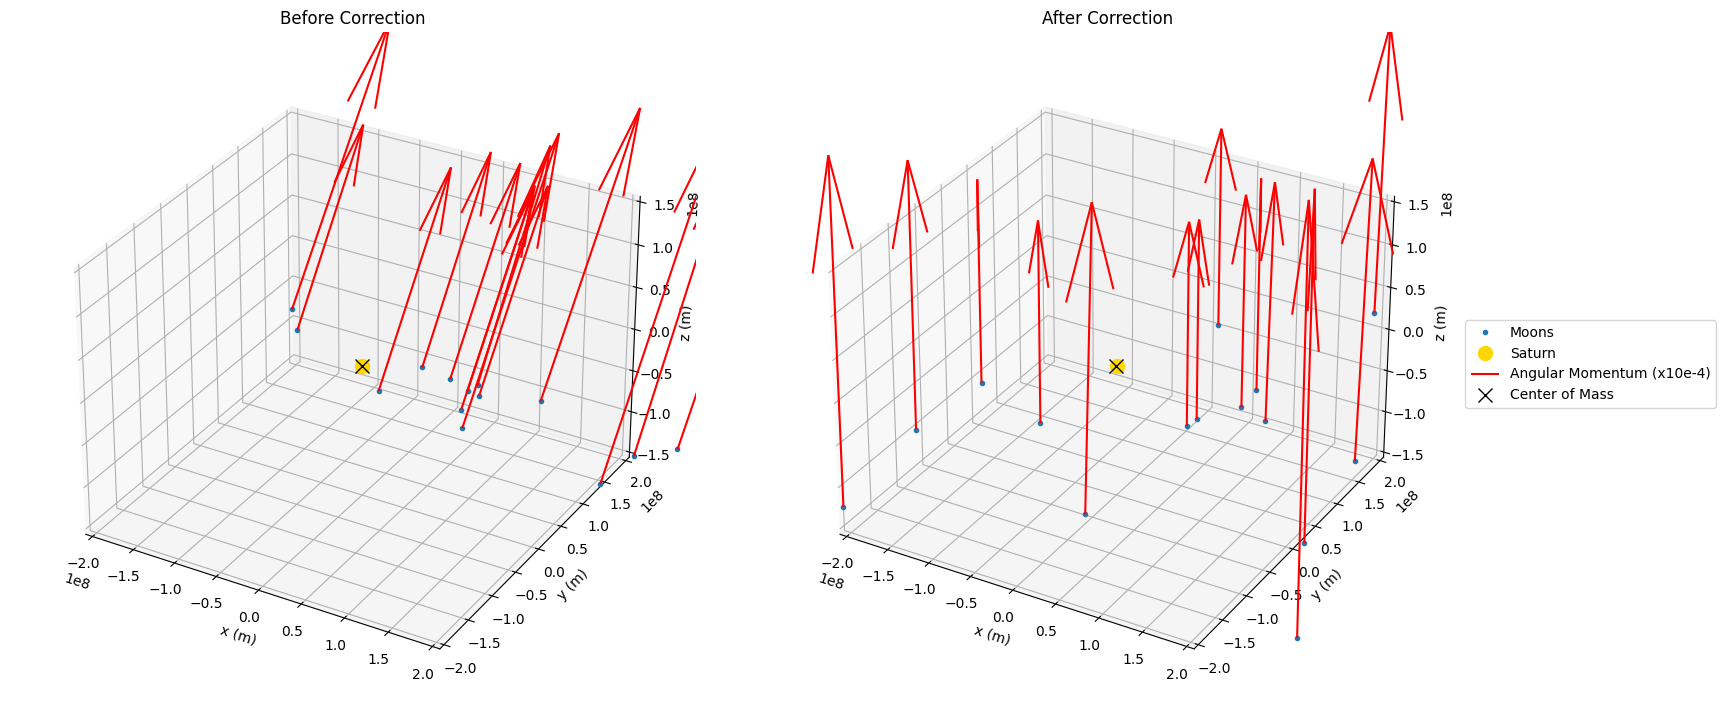

{'Saturn': {'ID': 699, 'Mass': 5.6834e+26, 'semi-major axis': 296500.0120610601, 'eccentricity': 0.02956413820910295, 'inclination': 27.55319583075099, 'r_0': {'x': 68618.46957637797, 'y': 285370.0248582383, 'z': 3752.786915003062}, 'v_0': {'vx': -1.3738454583545705, 'vy': 0.2902118551465069, 'vz': -0.008910477308102493}}, 'Mimas': {'ID': 601, 'Mass': 3.7493e+19, 'semi-major axis': 186043887.23800367, 'eccentricity': 0.02074910578669104, 'inclination': 28.20040106833222, 'r_0': {'x': 184864505.09671617, 'y': -22002229.98199375, 'z': 252038.23939812754}, 'v_0': {'vx': 1979.9984526957123, 'vy': 14127.472465468627, 'vz': -390.65991177552553}}, 'Enceladus': {'ID': 602, 'Mass': 1.08022e+20, 'semi-major axis': 237729789.8365292, 'eccentricity': 0.004851004372844461, 'inclination': 28.05390042077023, 'r_0': {'x': -109337051.10663754, 'y': -209954264.08201805, 'z': 38521.54148779368}, 'v_0': {'vx': 11266.18730865185, 'vy': -5833.758164116197, 'vz': 0.5136630742954739}}, 'Tethys': {'ID': 603, '

In [12]:
#showing rotating abilities
jd = Time('2017-11-18').jd  # Converts to Julian date
epoch = [jd]
rotated_data = rotate_data(saturn_data_final,epoch,True,True)
print(rotated_data)


In [13]:
#want to see saturn_data_final
#print(saturn_data_final)

#want dataframe of all data
df = convert_to_dataframe(saturn_data_final,include_mass=False ,include_time_independent= True, include_vectors=True)
print(df)

#want latex table of all the timeindependent variables: (see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html)
# df_lat = convert_to_dataframe(saturn_data_final,include_vectors=False)
# print(df_lat.to_latex(index=False,
# #                  formatters={"name": str.upper},
#                   float_format="{:.1f}".format,
# )) 

#want an C++ vector that can becopied into the C++ file:
#print(convert_to_cpp_vector(saturn_data_final))

        Object   ID  semi-major axis  eccentricity  inclination         r_0_x   
0       Saturn  699     2.965000e+05      0.029564    27.553196 -2.692892e+05  \
1        Mimas  601     1.860439e+08      0.020749    28.200401  5.131979e+07   
2    Enceladus  602     2.377298e+08      0.004851    28.053900  1.889143e+08   
3       Tethys  603     2.949713e+08      0.001271    29.129670  8.239220e+07   
4        Dione  604     3.768762e+08      0.002716    28.053989  3.456611e+08   
5         Rhea  605     5.267297e+08      0.001145    27.799889  4.086865e+08   
6        Titan  606     1.221620e+09      0.028675    27.694199  1.087036e+09   
7     Hyperion  607     1.486742e+09      0.124096    27.011468  1.001119e+09   
8      Iapetus  608     3.560663e+09      0.027966    17.076340  3.008624e+09   
9       Phoebe  609     1.295133e+10      0.153047   173.103714 -2.020626e+09   
10       Janus  610     1.521142e+08      0.011061    28.088789  3.295584e+07   
11  Epimetheus  611     1.52

In [180]:
#an example of showing of the multiple timesteps capability
saturn_data_long = get_saturn_moons_vectors(saturn_data,[2458075.5],600,100,21,include_time = True)

In [192]:
# Extract time tuples
time_tuples = extract_time_tuples(saturn_data_long)
print(time_tuples)

# dataframe
df_long = convert_to_dataframe(saturn_data_long, include_vectors=False, include_time=False)
print(df_long)

{'t_0': (2458075.5, 0), 't_1': (2458075.534722222, 3000), 't_2': (2458075.5694444445, 6000), 't_3': (2458075.6041666665, 9000), 't_4': (2458075.638888889, 12000), 't_5': (2458075.673611111, 15000), 't_6': (2458075.7083333335, 18000), 't_7': (2458075.7430555555, 21000), 't_8': (2458075.777777778, 24000), 't_9': (2458075.8125, 27000), 't_10': (2458075.847222222, 30000), 't_11': (2458075.875, 32400), 't_12': (2458075.909722222, 35400), 't_13': (2458075.9444444445, 38400), 't_14': (2458075.9791666665, 41400), 't_15': (2458076.013888889, 44400), 't_16': (2458076.048611111, 47400), 't_17': (2458076.0833333335, 50400), 't_18': (2458076.1180555555, 53400), 't_19': (2458076.152777778, 56400), 't_20': (2458076.1875, 59400)}
        Object   ID          Mass
0       Saturn  699  5.683400e+26
1        Mimas  601  3.749300e+19
2    Enceladus  602  1.080220e+20
3       Tethys  603  6.174490e+20
4        Dione  604  1.095452e+21
5         Rhea  605  2.306518e+21
6        Titan  606  1.345200e+23
7   

#### Some interesting code from previous stuff ####

In [138]:
# Define the parameters
# ID for Titan: 606
# ID for Saturn as the center of the system: 6
# Epoch in Julian date or list of calendar dates
target_id = 606
center_id = '500@6' # '@6' indicates the center is Saturn
epoch = [2458075.527777778] #[2460632.5]   # to calculate julian date see cell above
#epoch = {"start":'2024-11-18',"stop":'2024-11-19',"step":"30m"} would maybe be nicer then my implementation

# Query the Horizons database
titan = Horizons(id=target_id, location=center_id, epochs=epoch, id_type='id')

# Get vector information
vectors = titan.vectors()

# Extract and display the position and velocity vectors
position = vectors[['x', 'y', 'z']]  # x, y, z position relative to Saturn
velocity = vectors[['vx', 'vy', 'vz']]  # vx, vy, vz velocity relative to Saturn


#print statements
print("Position Vector (x, y, z) in AU relative to Saturn:")
print(position)

print("\nVelocity Vector (vx, vy, vz) in AU/day relative to Saturn:")
print(velocity)


Position Vector (x, y, z) in AU relative to Saturn:
         x                     y                    z          
         AU                    AU                   AU         
-------------------- --------------------- --------------------
0.007301635213433174 -0.002992402140982914 0.000817270629629972

Velocity Vector (vx, vy, vz) in AU/day relative to Saturn:
         vx                   vy                    vz         
       AU / d               AU / d                AU / d       
-------------------- -------------------- ---------------------
0.001251880500713217 0.002671801132362699 -0.001501366021714453


In [139]:
titan.vectors()

targetname,datetime_jd,datetime_str,x,y,z,vx,vy,vz,lighttime,range,range_rate
---,d,---,AU,AU,AU,AU / d,AU / d,AU / d,d,AU,AU / d
str11,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64
Titan (606),2458075.527777778,A.D. 2017-Nov-18 00:40:00.0000,0.007301635213433174,-0.002992402140982914,0.000817270629629972,0.001251880500713217,0.002671801132362699,-0.001501366021714453,4.581856640377299e-05,0.007933238849641564,-1.02544543481162e-05


In [25]:
titan.elements()[0]

targetname,datetime_jd,datetime_str,e,q,incl,Omega,w,Tp_jd,n,M,nu,a,Q,P
---,d,---,---,AU,deg,deg,deg,d,deg / d,deg,deg,AU,AU,d
str11,float64,str30,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Titan (606),2460632.5,A.D. 2024-Nov-18 00:00:00.0000,0.02873840802795882,0.007931372035583428,27.71136069486124,169.0710365656921,177.4041663964532,2460627.234047866,22.57500912933074,118.8789174954871,121.7122026841773,0.008166051351294187,0.008400730667004946,15.94683740491902
